In [1]:
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# prompt: impute missing values in age and fare using median

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


In [15]:
# prompt: discretize values in age using kbinsdiscrertizer

kbins = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
df['age_group'] = kbins.fit_transform(df['age'].values.reshape(-1, 1))
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


<Axes: xlabel='age', ylabel='Count'>

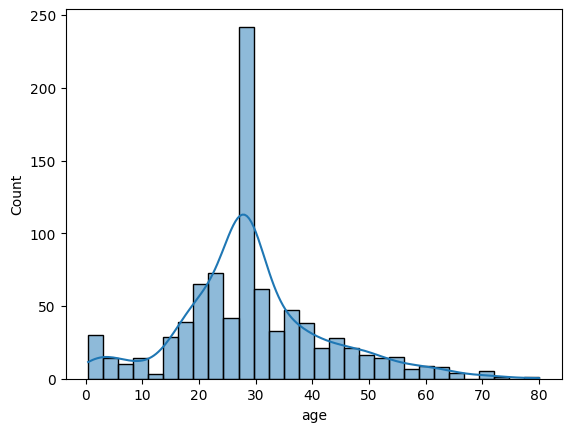

In [7]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

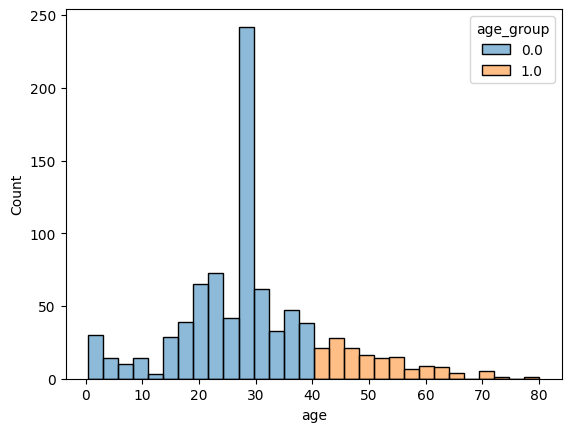

In [16]:
sns.histplot(df,x='age',hue='age_group')

In [17]:
#manual bining in pandas
bins=[0,10,18,30,50,80]
labels=['child','teen','young_adult','adult','old']
df['age_bin']=pd.cut(df['age'],bins=bins,labels=labels)

<Axes: xlabel='age', ylabel='Count'>

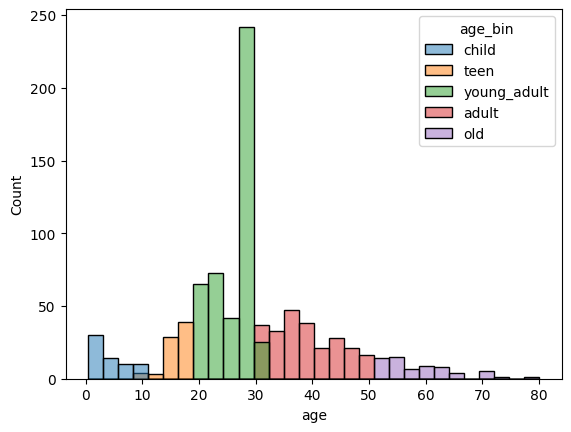

In [18]:
sns.histplot(df,x='age',hue='age_bin')